In [6]:
import numpy as np
import pandas as pd

data = []
with open('datasets/canadian_wages.txt') as f:
    lines = f.readlines()
    for line in lines:
        data.append(line.split())

data = np.array(data)
data = data[1:]
columns = ["age", "sex", "hourly_wages", "education_years"]
out = pd.DataFrame({columns[ix]: data[:,ix].astype(float) for ix in range(len(columns)) if columns[ix] != "sex"})
out.head()

,age,hourly_wages,education_years
0,40.0,10.56,15.0
1,19.0,11.00,13.0
2,46.0,17.76,14.0
3,50.0,14.00,16.0
4,31.0,8.20,15.0


In [7]:
out.to_csv("datasets/canadian_wages.csv")

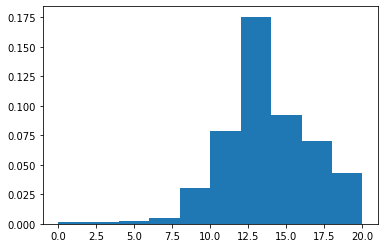

In [19]:
import matplotlib.pyplot as plt

plt.hist(out["education_years"], density=True, bins=10)
plt.show()

In [42]:
import pandas as pd


mortality_data = pd.read_csv("datasets/infant_mortality.csv")
print(mortality_data.shape)
mortality_data.head()

(105, 5)


,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


In [43]:
mortality_data = mortality_data.dropna()

In [44]:
mortality_data

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no
...,...,...,...,...,...
100,Uganda,134,160.0,Africa,no
101,Upper.Volta,82,180.0,Africa,no
102,Southern.Yemen,96,80.0,Asia,no
103,Yemen,77,50.0,Asia,no


In [45]:
mortality_data = mortality_data[["country", "income", "infant_mortality", "region", "oil"]]
mortality_data

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no
...,...,...,...,...,...
100,Uganda,134,160.0,Africa,no
101,Upper.Volta,82,180.0,Africa,no
102,Southern.Yemen,96,80.0,Asia,no
103,Yemen,77,50.0,Asia,no


In [46]:
import matplotlib.pyplot as plt

In [34]:
mortality_data.describe()

,income,infant_mortality
count,105.000000,101.000000
mean,998.066667,89.047525
std,1416.714294,90.801707
min,50.000000,9.600000
25%,123.000000,26.200000
50%,334.000000,60.600000
75%,1191.000000,129.400000
max,5596.000000,650.000000


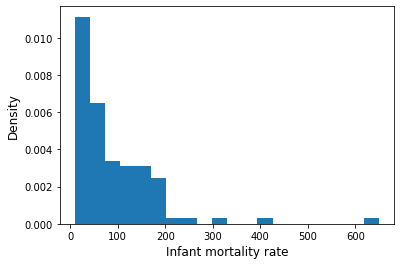

In [37]:
import matplotlib.pyplot as plt

plt.hist(mortality_data["infant_mortality"], bins=20, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

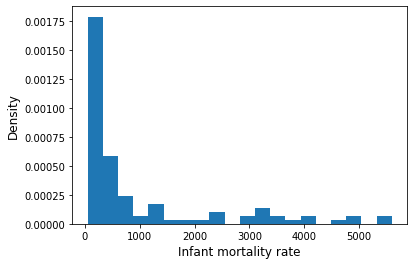

In [38]:
plt.hist(mortality_data["income"], bins=20, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

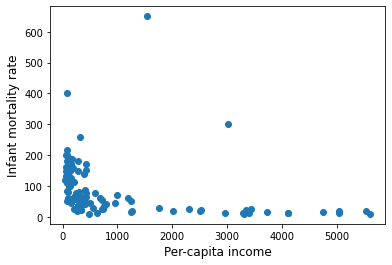

In [45]:
plt.scatter(mortality_data["income"], mortality_data["infant_mortality"])
plt.ylabel("Infant mortality rate", fontsize=12)
plt.xlabel("Per-capita income", fontsize=12)
plt.show()

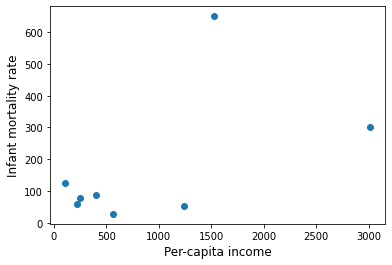

In [46]:
mortality_data_oil_exporting = mortality_data[mortality_data["oil"] == "yes"]

plt.scatter(mortality_data_oil_exporting["income"], mortality_data_oil_exporting["infant_mortality"])
plt.ylabel("Infant mortality rate", fontsize=12)
plt.xlabel("Per-capita income", fontsize=12)
plt.show()

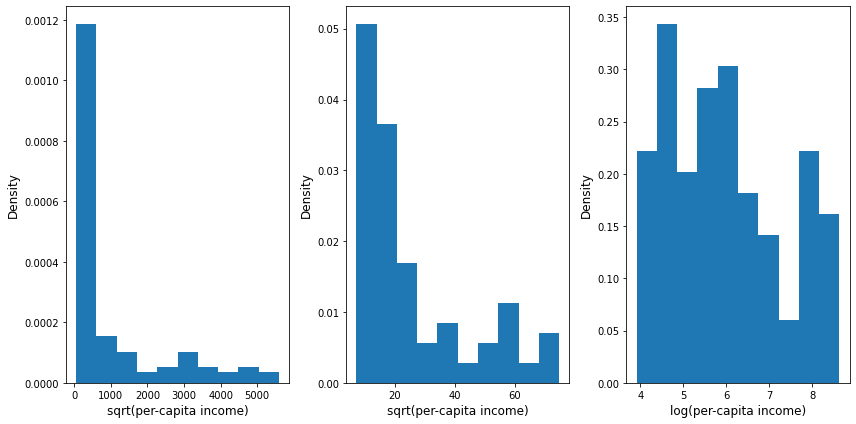

In [57]:
import numpy as np

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(12,6))
axs = axs.flatten()

axs[0].hist(mortality_data["income"], bins=10, density=True)
axs[0].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)

sqrt_income = np.sqrt(mortality_data["income"])
axs[1].hist(sqrt_income, bins=10, density=True)
axs[1].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[1].set_ylabel("Density", fontsize=12)

log_income = np.log(mortality_data["income"])
axs[2].hist(log_income, bins=10, density=True)
axs[2].set_xlabel("log(per-capita income)", fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()

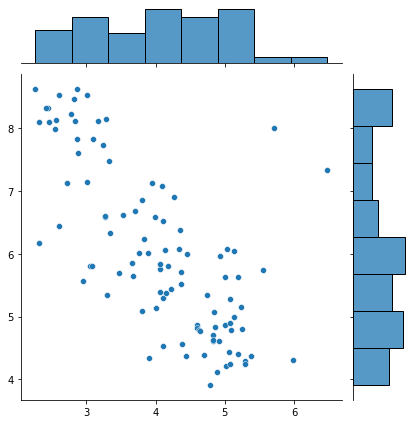

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# calling .to_numpy() on a column of a DataFrame gives you a numpy array back
log_income = np.log(mortality_data["income"].to_numpy())
log_infant_mortality = np.log(mortality_data["infant_mortality"].to_numpy())

sns.jointplot(x=log_infant_mortality, y=log_income)
plt.xlabel("log(Infant mortality rate)", fontsize=12)
plt.ylabel("log(Per-capita income)", fontsize=12)
plt.show()

In [19]:
def pearson_corr(x,y):
    # first compute the means of the two vectors
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    # compute numerator (1/n)*\sum_i (x_i - x_bar)*(y_i - y_bar)
    cov_xy = np.sum((x-x_bar)*(y-y_bar))/len(x)

    # compute the variance of x and y
    var_x = np.sum((x-x_bar)**2)/len(x)
    var_y = np.sum((y-y_bar)**2)/len(y)
    print(var_x, var_y)

    # compute the correlation
    r = cov_xy/np.sqrt(var_x*var_y)

    return r

In [20]:
r = pearson_corr(log_income, log_infant_mortality)
r

1.7797381408699178 0.9284024612726909


-0.7086068160294183

In [21]:
log_infant_mortality

array([3.28466357, 3.16547505, 2.83321334, 2.82137889, 2.60268969,
       2.31253542, 2.55722731, 3.0155349 , 2.87919846, 3.24649099,
       2.45958884, 2.4510051 , 2.78501124, 2.42480273, 3.80220814,
       4.26969745, 2.2617631 , 2.54944517, 2.86220088, 2.8678989 ,
       4.4578296 , 4.36309862, 4.82831374, 3.33576958, 5.70378247,
       4.06044301, 6.47697236, 3.94545778, 4.08765557, 5.13579844,
       4.35670883, 4.13995507, 3.99636415, 3.88773031, 3.32503602,
       4.37071287, 3.09557761, 3.26575941, 2.61006979, 3.4657359 ,
       4.10923317, 3.8286414 , 3.52929738, 4.17592455, 3.0155349 ,
       2.71469474, 2.94968834, 3.26575941, 4.33467294, 3.69882978,
       3.76815264, 5.55682806, 4.1009891 , 4.91998093, 5.19295685,
       4.73619845, 4.06388535, 4.15418456, 3.67122452, 4.92725369,
       3.05870707, 4.06044301, 5.07016127, 5.00394631, 2.32238772,
       3.65325228, 4.21803603, 3.07731226, 3.29583687, 5.03043792,
       4.60517019, 5.99146455, 4.822698  , 5.29831737, 5.01063

In [40]:
def fit_line(x, y):
    # first compute the means of the two vectors
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    # compute numerator (1/n)*\sum_i (x_i - x_bar)*(y_i - y_bar)
    cov_xy = np.sum((x-x_bar)*(y-y_bar))/len(x)

    # compute the variance of x and y
    var_x = np.sum((x-x_bar)**2)/len(x)
    
    # compute beta_hat
    beta_hat = cov_xy/var_x
    
    # compute alpha_hat
    alpha_hat = y_bar - beta_hat*x_bar

    return alpha_hat, beta_hat

In [49]:
alpha_hat, beta_hat = fit_line(log_income, log_infant_mortality)
alpha_hat, beta_hat

(7.14582359796337, -0.5117942628130397)

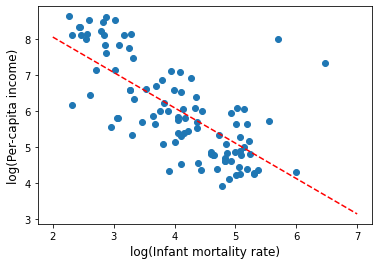

In [27]:
xx = np.linspace(2,7,5)
yy = alpha_hat + beta_hat*xx
plt.scatter(log_infant_mortality, log_income)
plt.plot(xx, yy, color='red', linestyle='--')
plt.xlabel("log(Infant mortality rate)", fontsize=12)
plt.ylabel("log(Per-capita income)", fontsize=12)
plt.show()

In [25]:
import pandas as pd
import numpy as np

out = []
with open('datasets/height_weight.txt') as f:
    lines = f.readlines()
    for j, line in enumerate(lines):
        if j>0:
            print(line.split())
            out.append(line.split())

out= np.array(out)
out[out == 'NA'] = np.nan
columns = ["sex", "weight", "height", "reported_weight", "reported_height"]
out = pd.DataFrame({columns[ix]: out[:,ix+1].astype(float) for ix in range(len(columns)) if columns[ix] != "sex"})

['1', 'M', '77', '182', '77', '180']
['2', 'F', '58', '161', '51', '159']
['3', 'F', '53', '161', '54', '158']
['4', 'M', '68', '177', '70', '175']
['5', 'F', '59', '157', '59', '155']
['6', 'M', '76', '170', '76', '165']
['7', 'M', '76', '167', '77', '165']
['8', 'M', '69', '186', '73', '180']
['9', 'M', '71', '178', '71', '175']
['10', 'M', '65', '171', '64', '170']
['11', 'M', '70', '175', '75', '174']
['12', 'F', '166', '57', '56', '163']
['13', 'F', '51', '161', '52', '158']
['14', 'F', '64', '168', '64', '165']
['15', 'F', '52', '163', '57', '160']
['16', 'F', '65', '166', '66', '165']
['17', 'M', '92', '187', '101', '185']
['18', 'F', '62', '168', '62', '165']
['19', 'M', '76', '197', '75', '200']
['20', 'F', '61', '175', '61', '171']
['21', 'M', '119', '180', '124', '178']
['22', 'F', '61', '170', '61', '170']
['23', 'M', '65', '175', '66', '173']
['24', 'M', '66', '173', '70', '170']
['25', 'F', '54', '171', '59', '168']
['26', 'F', '50', '166', '50', '165']
['27', 'F', '63', 

In [26]:
out = out.dropna()
out["weight"].mean()

66.30386740331491

In [27]:
out= out.dropna()

In [20]:
out.to_csv("datasets/height_weight.csv")

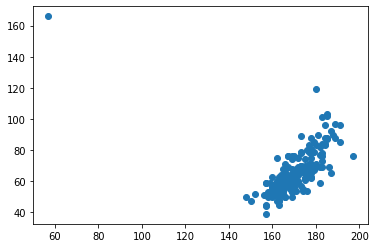

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(out["height"], out["weight"])
plt.show()

In [50]:
out = out[out["weight"]<=140]

In [53]:
out = out[["height", "weight"]]
out.to_csv("datasets/height_weight.csv")

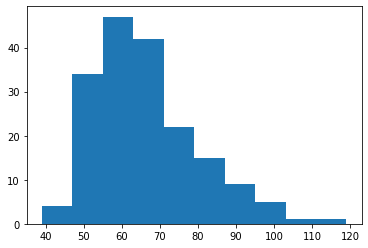

In [52]:
plt.hist(out["weight"], bins=10)
plt.show()

In [38]:
height_weight_data = out

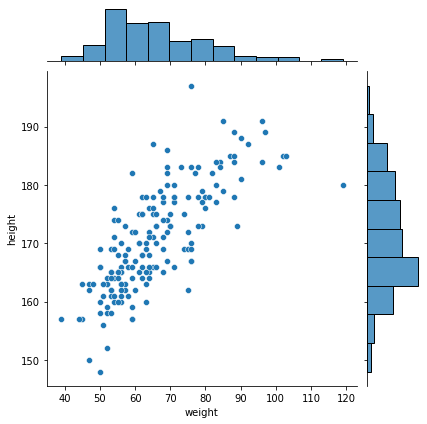

In [39]:
height = height_weight_data["height"]
weight = height_weight_data["weight"]

sns.jointplot(x=weight, y=height)
plt.ylabel("height", fontsize=12)
plt.xlabel("weight", fontsize=12)
plt.show()

alpha = 137.08690903754507, beta = 0.5124931451830912


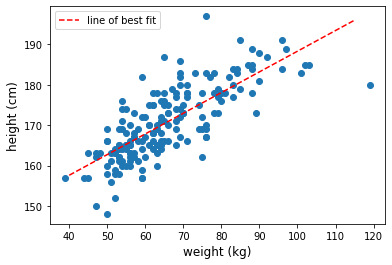

In [41]:
alpha_hat, beta_hat = fit_line(weight, height)
print(f"alpha = {alpha_hat}, beta = {beta_hat}")

xx = np.linspace(40,115,4)
yy = alpha_hat + beta_hat*xx
plt.scatter(weight, height)
plt.plot(xx, yy, color='red', linestyle='--', label='line of best fit')
plt.ylabel("height (cm)", fontsize=12)
plt.xlabel("weight (kg)", fontsize=12)
plt.legend()
plt.show()

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
cols = housing["feature_names"]
data = housing["data"]

In [5]:
import pandas as pd

dataset = pd.DataFrame({cols[j]:data[:,j] for j in range(len(cols))})
dataset["MedHouseVal"] = housing["target"]
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


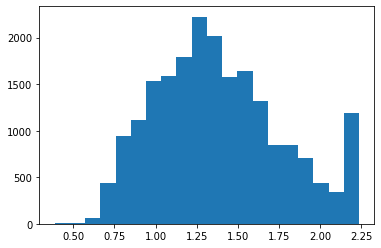

In [10]:
import matplotlib.pyplot as plt 
import numpy as np

plt.hist(np.sqrt(dataset["MedHouseVal"]), bins=20)
plt.show()

In [11]:
dataset.to_csv("datasets/california_housing.csv")

In [12]:
dd = pd.read_csv("datasets/california_housing.csv")

In [13]:
dd

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
dataset.to_csv("datasets/california_housing.csv", index=False)

In [31]:
dd = pd.read_csv("datasets/california_housing.csv")
dd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


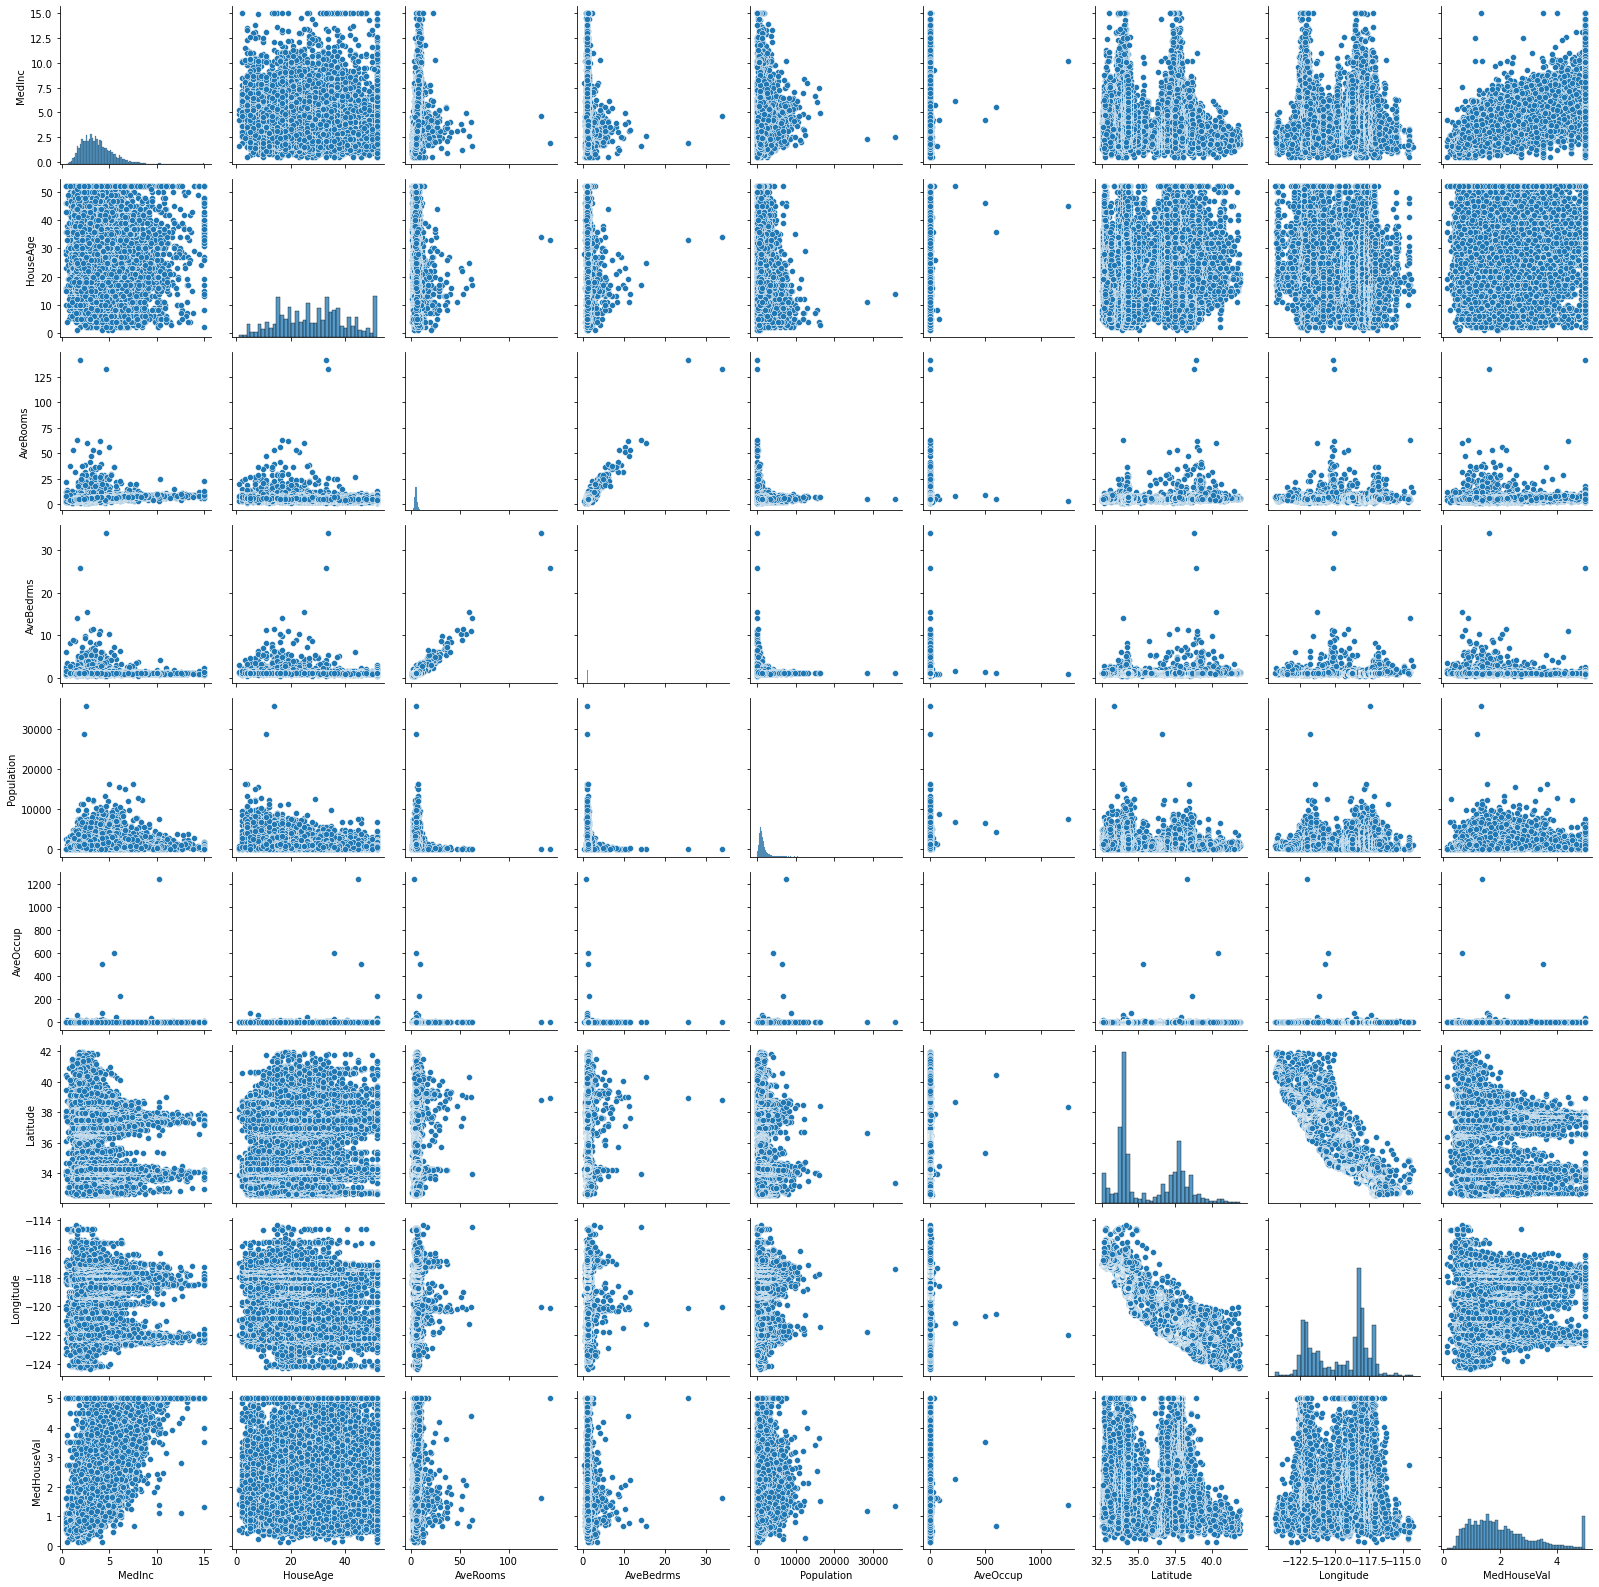

In [35]:
import seaborn as sns

fig = sns.PairGrid(dataset)
fig.map_offdiag(sns.scatterplot)
fig.map_diag(sns.histplot)


In [36]:
import numpy as np

def fit_linear_regression(X, y):
    # compute X^TX
    XTX = np.dot(X.T, X)

    # compute the inverse of X^TX
    XTX_inverse = np.linalg.inv(XTX)

    # compute X^Ty
    XTy = np.dot(X.T, y)

    # compute the least squares coefficients beta = (X^TX)^{-1}X^Ty
    beta_hat = np.dot(XTX_inverse, XTy)

    return beta_hat

In [37]:
X = dataset[[c for c in dataset.columns if c!="MedHouseVal"]].to_numpy()
y = dataset["MedHouseVal"].to_numpy()
print(X.shape, y.shape)

(20640, 8) (20640,)


In [39]:
# create a (n, 1) array of all ones
#ones = np.ones(X.shape[0]).reshape(-1,1)

# add this array as a new column of X
#X = np.hstack([ones, X])

# print the first 5 rows
X[:5]

array([[ 1.00000000e+00,  8.32520000e+00,  4.10000000e+01,
         6.98412698e+00,  1.02380952e+00,  3.22000000e+02,
         2.55555556e+00,  3.78800000e+01, -1.22230000e+02],
       [ 1.00000000e+00,  8.30140000e+00,  2.10000000e+01,
         6.23813708e+00,  9.71880492e-01,  2.40100000e+03,
         2.10984183e+00,  3.78600000e+01, -1.22220000e+02],
       [ 1.00000000e+00,  7.25740000e+00,  5.20000000e+01,
         8.28813559e+00,  1.07344633e+00,  4.96000000e+02,
         2.80225989e+00,  3.78500000e+01, -1.22240000e+02],
       [ 1.00000000e+00,  5.64310000e+00,  5.20000000e+01,
         5.81735160e+00,  1.07305936e+00,  5.58000000e+02,
         2.54794521e+00,  3.78500000e+01, -1.22250000e+02],
       [ 1.00000000e+00,  3.84620000e+00,  5.20000000e+01,
         6.28185328e+00,  1.08108108e+00,  5.65000000e+02,
         2.18146718e+00,  3.78500000e+01, -1.22250000e+02]])

In [40]:
beta_hat = fit_linear_regression(X, y)

In [41]:
# get all the names of the columns
feature_names = ["Intercept"] + [c for c in dataset.columns if c!="MedHouseVal"]

for name, coeff in zip(feature_names, beta_hat):
    print(f"{name}: {coeff}")

Intercept: -36.9419202074223
MedInc: 0.43669329313360095
HouseAge: 0.009435778033197284
AveRooms: -0.10732204138997758
AveBedrms: 0.6450656935160453
Population: -3.976389421293108e-06
AveOccup: -0.003786542654963143
Latitude: -0.42131437752948386
Longitude: -0.4345137546774538


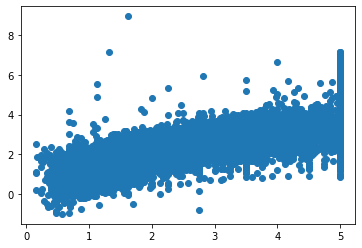

In [43]:
y_hat = np.dot(X, beta_hat)

plt.scatter(y, y_hat)
plt.show()

In [44]:
y_bar = np.mean(y)

In [45]:
RSS = np.sum((y-y_hat)**2)
TSS = np.sum((y-y_bar)**2)
RegSS = TSS-RSS

In [46]:
R2 = RegSS/TSS
R2

0.6062326851998049

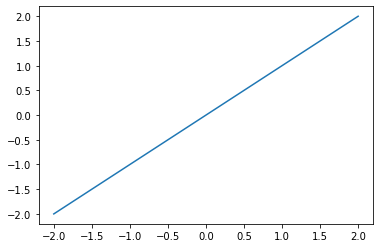

In [56]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-2,2,10)

plt.plot(xx, xx, label='span([1,1])')
plt.show()

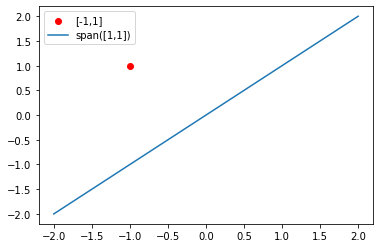

In [57]:
plt.scatter([-1], [1], color='red', label='[-1,1]')
plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.show()

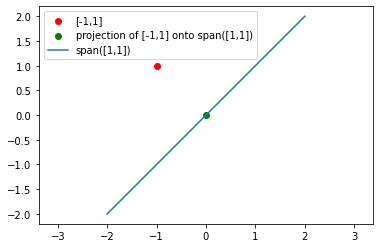

In [58]:
plt.scatter([-1], [1], color='red', label='[-1,1]')
plt.scatter([0], [0], color='green', label='projection of [-1,1] onto span([1,1])')
plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.axis("equal")
plt.show()

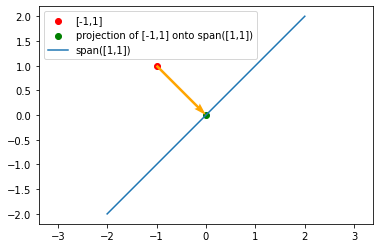

In [66]:
plt.scatter([-1], [1], color='red', label='[-1,1]')
plt.scatter([0], [0], color='green', label='projection of [-1,1] onto span([1,1])')
plt.quiver(*[-1,1],*[1,-1], scale=1, units='xy', color='orange')
plt.plot(xx, xx, label='span([1,1])')
plt.legend()
plt.axis("equal")
plt.show()

In [71]:
p = 100
n = 50

X = np.random.normal(size=(n,p))
beta_true = np.random.normal(size=p)
y = np.dot(X, beta_true) + 0.2*np.random.normal(size=n)

In [73]:
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)

In [74]:
np.dot(XTX, XTX_inv)

array([[ 1.75585938e+00, -2.26562500e-01,  5.31250000e-01, ...,
        -6.25000000e-01, -1.02343750e+00,  1.32421875e+00],
       [-7.81250000e-01, -2.50000000e-01,  2.00000000e+00, ...,
         1.30000000e+01, -2.25000000e+00, -2.50000000e-01],
       [-8.12500000e-01, -1.37500000e+00,  2.43750000e+00, ...,
         1.07500000e+01, -1.50000000e+00,  5.93750000e-01],
       ...,
       [-8.82812500e-01,  7.50000000e-01, -1.43750000e+00, ...,
        -5.00000000e-01, -1.43750000e+00, -3.43750000e-01],
       [ 8.02612305e-03, -1.00585938e+00,  5.87158203e-01, ...,
         9.62402344e+00,  1.69335938e+00, -1.50537109e+00],
       [-5.62500000e-01, -2.00000000e+00, -5.00000000e-01, ...,
         8.00000000e+00, -1.00000000e+00,  3.00000000e+00]])

In [75]:
beta_hat_bad = np.dot(XTX_inv, np.dot(X.T, y))

# check if (XTX beta_hat) == XTy
np.allclose(np.dot(XTX, beta_hat_bad), np.dot(X.T, y))

False

In [76]:
X_pinv = np.linalg.pinv(X)
beta_hat_good = np.dot(X_pinv, y)

np.allclose(np.dot(XTX, beta_hat_good), np.dot(X.T, y))

True

In [35]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("datasets/qsar_fish_toxicity.csv")
dataset.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [36]:
y = dataset["LC50"].to_numpy()
cols = [c for c in dataset.columns if c!="LC50"]
X = dataset[cols].to_numpy()
ones = np.ones(X.shape[0]).reshape(-1,1)
X = np.hstack([ones, X])

In [37]:
X.shape, y.shape

((908, 7), (908,))

In [38]:
# compute beta_hat = (XTX)^{-1}XTy
XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
beta_hat = np.dot(XTX_inv, np.dot(X.T, y))

# compute sigma2_hat = |y-y_hat|^2/n
y_hat = np.dot(X, beta_hat)
sigma2_hat = np.mean((y-y_hat)**2)

# print the coefficients and the estimated variance for each coefficient
cols = ["intercept"] + cols
for j in range(len(cols)):
    sigma2_hat_j = sigma2_hat*XTX_inv[j,j]
    print(f"coefficent for {cols[j]}: {round(beta_hat[j],4)}, variance for {cols[j]}: {round(sigma2_hat_j,4)}")

coefficent for intercept: 2.1746, variance for intercept: 0.0326
coefficent for CIC0 : 0.3856, variance for CIC0 : 0.0037
coefficent for SM1_Dz(Z) : 1.2556, variance for SM1_Dz(Z) : 0.0075
coefficent for GATS1i : -0.7464, variance for GATS1i : 0.0102
coefficent for NdsCH: 0.4136, variance for NdsCH: 0.0029
coefficent for NdssC: 0.0643, variance for NdssC: 0.0016
coefficent for MLOGP: 0.3901, variance for MLOGP: 0.0011


In [24]:
np.sqrt(sigma2_hat)

0.9460592524989007

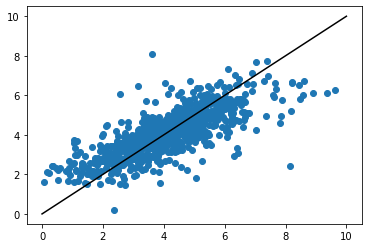

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y, y_hat)
plt.plot([0,10], [0,10], color='black')
plt.show()

In [ ]:
# calculates the normal pdf
def normal_pdf(z, mu, sigma2):
    return 1./np.sqrt(2*np.pi*sigma2)*np.exp(-(z-mu)**2/(2*sigma2))

# plots the normal pdf
def plot_normal_pdf(mu, sigma2, z_min=-2, z_max=2, label=None, title="The Normal Distribution"):
    zz = np.linspace(z_min, z_max, 100)
    plt.plot(zz, )

In [28]:
np.pi

3.141592653589793

In [ ]:
for j, col in enumerate(cols):
    sigma2_j = sigma2_hat*XTX_inv[j,j]
    zz = np.linspace(beta_hat[j]-3*sigma2_j, beta_hat[j]+3*sigma2_j, 100)
    plt.plot(zz, normal_pdf(zz, ))